In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
from scipy.signal import find_peaks_cwt
import os

%matplotlib inline

In [2]:
image = mpimg.imread("image.jpg").mean(2)
image.shape

(720, 1280)

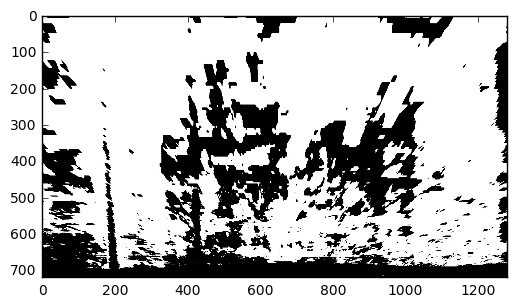

In [3]:
plt.imshow(image, cmap='gray')

C:\Users\sijuade\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


[317, 1125]

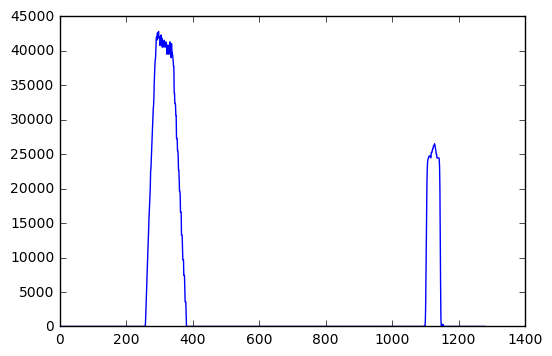

In [4]:
histogram = np.sum(image[image.shape[0]/2:,:], axis=0)
plt.plot(histogram)
p = find_peaks_cwt(histogram, np.arange(200, 300))
p

In [4]:
breaks = 10


In [7]:
hslice = hSlice(image)

In [8]:
def hSlice(image):
    return image[:, 0: int(image.shape[1] / 2)], image[:, int(image.shape[1] / 2): image.shape[1]]

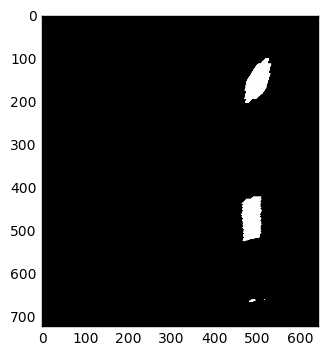

In [10]:
plt.imshow(hslice[1], cmap='gray')

In [9]:
def vSlice(image, breaks=10):
    slices = []
    ratio = int(image.shape[0]/breaks)
    for i in range(breaks):
        slices.append(image[ratio*i:(i+1)*ratio])
    return slices

In [10]:
vslices = vSlice(image, breaks=20)

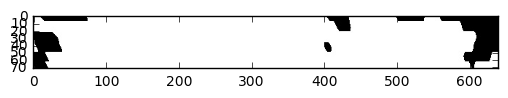

In [11]:
plt.imshow(vSlice(hSlice(image)[0])[0], cmap='gray')

In [12]:
leftImage, rightImage = hSlice(image)

In [31]:
def moveWin(lastFound, width, d=0):
    output = None
    if d==0:
        output = lastFound - width
        if output < 0:
            output = 0
    else:
        output = lastFound + width
        if output >= 640:
            output = 640
    
    return output

def detect_lane(image, breaks=10):
    width = 100
    
    hslice = hSlice(image)
    
    histogram = np.sum(hslice[0][int(hslice[0].shape[0]/2):,:], axis=0)
    lpeaks = find_peaks_cwt(histogram, np.arange(200, 300))[0]
    
    histogram = np.sum(hslice[1][int(hslice[1].shape[0]/2):,:], axis=0)
    rpeaks = find_peaks_cwt(histogram, np.arange(200, 300))[0]
    
    points = {}
    points[0], points[1] = [], []
    
    lastFound = None
    
    for each in range(2):
        
        vslices = vSlice(hslice[each])
        
        if each == 0:
            points[each].append(lpeaks)
            lastFound = lpeaks
        else:
            points[each].append(rpeaks)
            lastFound = rpeaks
            
        for i in range(breaks-2, -1, -1):
            im = vslices[i]

            histogram = np.sum(im[:,moveWin(lastFound, width, d=0): moveWin(lastFound, width, d=1)], axis=0)
            peaks = find_peaks_cwt(histogram, np.arange(200, 300))


            points[each].append(peaks[0] + lastFound - width if peaks else None)

            if peaks:
                print("peaks- ", peaks[0])
                print("last- ", lastFound)
                lastFound = peaks[0]
            
    return points
    
            
        

In [10]:
hslice = hSlice(image)

In [11]:
histogram = np.sum(hslice[0][int(hslice[0].shape[0]/2):,:], axis=0)

In [13]:
lpeaks = find_peaks_cwt(histogram, np.arange(1, 800))[0]
lpeaks

323

In [14]:
lpeaks = np.argmax(histogram)
lpeaks

213

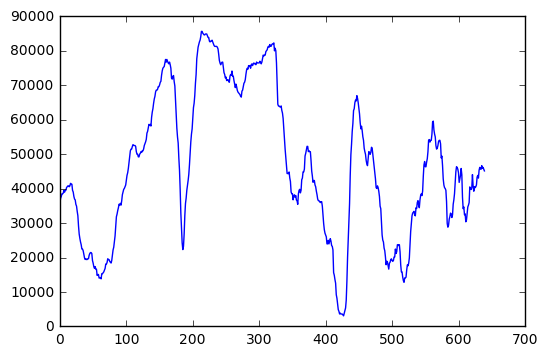

In [15]:
plt.plot(histogram)

In [14]:
zeroone  = mpimg.imread("zero.jpg")
zerotwo  = mpimg.imread("zero2.jpg")
zerothree  = mpimg.imread("zero1.jpg")

In [22]:
hslice = hSlice(zeroone)
vslices = vSlice(hslice[1], breaks=breaks)
print(len(hslice), len(vslices))

2 10


In [30]:
histogram = np.sum(vslices[1], axis=0)
peak = np.argmax(histogram)
peak

23

In [18]:
hslice = hSlice(zeroone)

histogram = np.sum(hslice[0][int(hslice[0].shape[0]/2):,:], axis=0)
lpeaks = find_peaks_cwt(histogram, np.arange(1, 800))[0]
lpeaks = np.argmax(histogram)

histogram = np.sum(hslice[1][int(hslice[1].shape[0]/2):,:], axis=0)
rpeaks = find_peaks_cwt(histogram, np.arange(1, 800))[0]
rpeaks = np.argmax(histogram)


points = {}
points[0], points[1] = [], []

breaks = 10

lastFound = None

width = 300

for each in range(2):

    vslices = vSlice(hslice[each], breaks=breaks)

    if each == 0:
        points[0].append(lpeaks)
        lastFound = lpeaks
    else:
        points[1].append(rpeaks)
        lastFound = rpeaks

    for i in range(breaks-2, -1, -1):
        im = vslices[i]

        histogram = np.sum(im[:,moveWin(lastFound, width, d=0): moveWin(lastFound, width, d=1)], axis=0)
        peaks = find_peaks_cwt(histogram, np.arange(200, 300))
        
            
        points[each].append(peaks[0] + moveWin(lastFound, width, d=0) if peaks else None)
        
        if peaks:
            print("peaks- ", peaks[0])
            print("last- ", lastFound)
            lastFound = peaks[0]
        else:
            print("last(no peak)- ", lastFound)

peaks-  128
last-  213
peaks-  134
last-  128
peaks-  150
last-  134
peaks-  105
last-  150
peaks-  148
last-  105
peaks-  150
last-  148
peaks-  150
last-  150
peaks-  150
last-  150
peaks-  150
last-  150
peaks-  150
last-  493
peaks-  150
last-  150
peaks-  184
last-  150
peaks-  219
last-  184
peaks-  150
last-  219
peaks-  150
last-  150
peaks-  150
last-  150
peaks-  150
last-  150
peaks-  106
last-  150


In [19]:
points

{0: [213, 341, 262, 284, 255, 253, 298, 300, 300, 300],
 1: [493, 343, 300, 334, 403, 369, 300, 300, 300, 256]}

In [20]:
lPoints = np.array([x for x in points[0] if x != None])
rPoints = np.array([x for x in points[1] if x != None]) + 640

lNone = [i for i, e in enumerate(points[0]) if e != None]
rNone = [i for i, e in enumerate(points[1]) if e != None]


In [21]:
points

{0: [213, 341, 262, 284, 255, 253, 298, 300, 300, 300],
 1: [493, 343, 300, 334, 403, 369, 300, 300, 300, 256]}

In [22]:
lPoints, rPoints

(array([291, 303, 302, 332, 334, 371, 371, 416, 417, 468], dtype=int64),
 array([1127, 1115, 1124, 1124, 1133, 1135], dtype=int64))

In [22]:
x = float(image.shape[0] / breaks)
yvals = np.linspace(0, breaks, num=breaks)* x
yvals = yvals[::-1]

leftYvals = yvals[lNone]
left_fit = np.polyfit(leftYvals, lPoints, 2)
left_fitx = left_fit[0]*yvals**2 + left_fit[1]*yvals + left_fit[2]

rightYvals = yvals[rNone]
right_fit = np.polyfit(rightYvals, rPoints, 2)
right_fitx = right_fit[0]*yvals**2 + right_fit[1]*yvals + right_fit[2]

y_eval = np.max(yvals)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) \
                             /np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) \
                                /np.absolute(2*right_fit[0])

ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meteres per pixel in x dimension

left_fit_cr = np.polyfit(leftYvals*ym_per_pix, lPoints*xm_per_pix, 2)
right_fit_cr = np.polyfit(rightYvals*ym_per_pix, rPoints*xm_per_pix, 2)
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval + left_fit_cr[1])**2)**1.5) \
                             /np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval + right_fit_cr[1])**2)**1.5) \
                                /np.absolute(2*right_fit_cr[0])

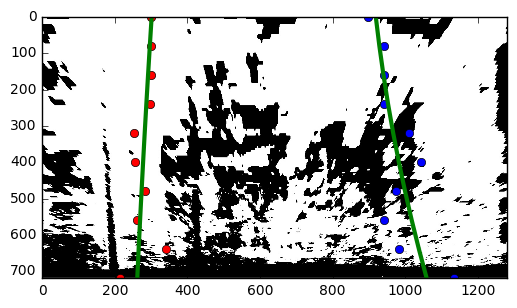

In [23]:
plt.imshow(image, cmap='gray')
plt.plot(lPoints, leftYvals, 'o', color='red')
plt.plot(rPoints, rightYvals, 'o', color='blue')

plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, yvals, color='green', linewidth=3)
plt.plot(right_fitx, yvals, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images

In [389]:
rNone

[0, 2]